<a href="https://colab.research.google.com/github/ChristianEspirituCueva/Measurements_CNN/blob/main/CNN_Measurement_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Clonamos el repositorio donde tenemos los archivos que almacenan nuestros datos
#necesarios
!git clone https://github.com/ChristianEspirituCueva/Files_Masters.git

Cloning into 'Files_Masters'...
remote: Enumerating objects: 565, done.
remote: Total 565 (delta 0), reused 0 (delta 0), pack-reused 565
Receiving objects: 100% (565/565), 49.55 MiB | 26.16 MiB/s, done.
Resolving deltas: 100% (22/22), done.


In [2]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.8 MB 115 kB/s 


In [3]:
#Bibliotecas que utilizaremos
import numpy as np 
import cv2
import pandas as pd 
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import UpSampling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Lambda
from keras.layers.core import Dense
from keras.layers import Concatenate
from keras.layers import Flatten
from keras.layers import Input
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread 
import os

In [4]:
#Obtenemos la lista de archivos del directorio train_x y train_y
path_x=os.listdir("Files_Masters/train_x")
path_y=os.listdir("Files_Masters/train_y")

In [5]:
#Obtenemos las rutas de las imagenes, las almacenamos y las ordenamos
path_images_f=["Files_Masters/train_x/"+x for x in path_x if int(x[-15:-12])!=35 and "frontal.png" in x and int(x[-15:-12])<176]
path_images_l=["Files_Masters/train_x/"+x for x in path_x if int(x[-15:-12])!=35 and "lateral.png" in x and int(x[-15:-12])<176]

path_text=["Files_Masters/train_y/"+y for y in path_y if int(y[-7:-4])!=35 and int(y[-7:-4])<176]

path_images_f.sort()
path_images_l.sort()

path_text.sort()

In [6]:
#Obtenemos solos los valores de las 6 primeras medidas encontradas en los .TXT
#Obtenemos la altura del obj 3D
inp_3=[]

out_1=[]
out_2=[]
out_3=[]
out_4=[]
out_5=[]
out_6=[]

#En las listas creadas en lineas anteriores, almancenamos las medidas 
#que obtenemos, y tambíen la altura
for path in path_text:
  with open(path, 'r') as file:
      for line in file:
        if "Seat_Back_Angle" in line:
          aux_1=line.index("=")
          aux_2=line[aux_1+1:]
          out_1+=[float(aux_2)]
        elif "Outseam" in line:
          aux_1=line.index("=")
          aux_2=line[aux_1+1:]
          out_2+=[float(aux_2)]
        elif "Inseam" in line:
          aux_1=line.index("=")
          aux_2=line[aux_1+1:]
          out_3+=[float(aux_2)] 
        elif "CROTCH_H" in line:
          aux_1=line.index("=")
          aux_2=line[aux_1+1:]
          out_4+=[float(aux_2)] 
        elif "TrouserWAIST_Circ" in line:
          aux_1=line.index("=")
          aux_2=line[aux_1+1:]
          out_5+=[float(aux_2)] 
        elif "HIP_Circ" in line:
          aux_1=line.index("=")
          aux_2=line[aux_1+1:]
          out_6+=[float(aux_2)]
        #Este va a ser nuestro otro INPUT la altura
        elif "Head_Top_Height" in line:
          aux_1=line.index("=")
          aux_2=line[aux_1+1:]
          inp_3+=[float(aux_2)]

In [7]:
#Creamos un Data Frame el cual nos ayudará a tener ordenados nuestros datos
#Estos podran servisualizados mucho mejor
df= pd.DataFrame({'Path-Frontal':path_images_f,
                  'Path-Lateral':path_images_l,
                  'Height':inp_3,
                  'SeatBackAngle':out_1,
                  'Outseam':out_2,
                  'Inseam':out_3,
                  'Crotch':out_4,
                  'TrouserWaist':out_5,
                  'HipCirc':out_6})

In [8]:
#Guardamos un copia del Data Frame
df_v1=df.copy()
df

,Path-Frontal,Path-Lateral,Height,SeatBackAngle,Outseam,Inseam,Crotch,TrouserWaist,HipCirc
0,Files_Masters/train_x/female_0000_frontal.png,Files_Masters/train_x/female_0000_lateral.png,162.6,18.7,99.2,78.9,78.0,84.4,94.2
1,Files_Masters/train_x/female_0001_frontal.png,Files_Masters/train_x/female_0001_lateral.png,159.0,19.6,89.5,71.7,70.6,83.7,99.3
2,Files_Masters/train_x/female_0002_frontal.png,Files_Masters/train_x/female_0002_lateral.png,169.6,18.3,106.5,81.3,80.2,95.3,107.9
3,Files_Masters/train_x/female_0003_frontal.png,Files_Masters/train_x/female_0003_lateral.png,163.5,20.1,99.1,77.4,76.0,81.5,89.3
4,Files_Masters/train_x/female_0004_frontal.png,Files_Masters/train_x/female_0004_lateral.png,153.0,13.0,92.3,72.6,71.5,97.2,100.3
...,...,...,...,...,...,...,...,...,...
170,Files_Masters/train_x/female_0171_frontal.png,Files_Masters/train_x/female_0171_lateral.png,162.4,24.9,101.8,74.9,73.4,100.2,117.2
171,Files_Masters/train_x/female_0172_frontal.png,Files_Masters/train_x/female_0172_lateral.png,138.9,25.5,95.2,73.1,72.2,71.8,90.0
172,Files_Masters/train_x/female_0173_frontal.png,Files_Masters/train_x/female_0173_lateral.png,159.5,19.6,94.2,76.7,75.4,84.0,89.3
173,Files_Masters/train_x/female_0174_frontal.png,Files_Masters/train_x/female_0174_lateral.png,164.8,15.4,101.4,80.1,79.0,86.8,96.9


In [9]:
#En un nuevo Data Frame guardamos solo las medidas
#Esto para poder obtener la media y su desviación estandar de cada columna
height_df=df[['Height']]

In [10]:
height_df

,Height
0,162.6
1,159.0
2,169.6
3,163.5
4,153.0
...,...
170,162.4
171,138.9
172,159.5
173,164.8


In [11]:
# means = [height_df[col].mean() for col in height_df]
# std_devs = [height_df[col].std() for col in height_df]

# # Create TensorFlow preprocessing function for stats stream

# import tensorflow as tf

# def height_scl(tensor):
#   return (tensor - means) / std_devs

# #stat_scaler(tf.constant([2, 3, 4, 5, 6], dtype=tf.float32))

In [12]:
def getNeck(w,h,results,img):
  y_s=(int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].y*h))
  y_m=(int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.MOUTH_RIGHT].y*h))
  return int((y_s+y_m)*(1-0.1)/2) 

def getNeck2(w,h,results,img):
  y_s=(int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].y*h))
  y_m=(int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.MOUTH_RIGHT].y*h))
  return int((y_s+y_m)/2) 

In [13]:
def getMidtermPointRight(w,h,results,img):
  y_w=(int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].y*h))
  x_w=(int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST].x*w))
  x_f=(int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].x*w))
  return int((x_w+x_f)/2),int(y_w*(1+0.03)) 

In [14]:
def getMidtermPointLeft(w,h,results,img):
  y_w=(int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].y*h))
  x_w=(int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_WRIST].x*w))
  x_f=(int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].x*w))
  return int((x_w+x_f)/2),int(y_w*(1+0.03)) 

In [15]:
def getBotPointRight(w,h,results,img):
  y_a=(int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].y*h))
  x_a=(int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].x*w))
  return int((x_a+(w/2))/2),int(y_a*(1+0.01))

In [16]:
def getBotPointLeft(w,h,results,img):
  y_a=(int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE].y*h))
  x_a=(int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE].x*w))
  return int((x_a+(w/2))/2),int(y_a*(1+0.01))

def getBotPointLeft2(w,h,results,img):
  y_a=(int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE].y*h))
  x_a=(int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE].x*w))
  return int(y_a*(1+0.01))  

In [17]:
import cv2
import mediapipe as mp
import math
import numpy as np
import matplotlib.pyplot as plt

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose


def process_person_body(file: str) -> any:
    BG_COLOR = (255, 255, 255)
    with mp_pose.Pose(
            static_image_mode=True,
            model_complexity=2,
            enable_segmentation=True,
            min_detection_confidence=0.5) as pose:
    
      image = cv2.imread(file)
      image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      results = pose.process(image_rgb)
      h,w,_=image.shape

      if results.pose_landmarks is not None:

        image_no_bg = image.copy()
        condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
        bg_image = np.zeros(image.shape, dtype=np.uint8)
        bg_image[:] = BG_COLOR
        image_no_bg = np.where(condition, image_no_bg, bg_image)

        if 'frontal' in file:
          neck_y=getNeck(w,h,results,image_no_bg)

          mid_right_x,mid_right_y=getMidtermPointRight(w,h,results,image_no_bg)

          mid_left_x,mid_left_y=getMidtermPointLeft(w,h,results,image_no_bg)

          bot_right_x,bot_right_y=getBotPointRight(w,h,results,image_no_bg)

          bot_left_x,bot_left_y=getBotPointLeft(w,h,results,image_no_bg)  

          image_no_bg[:neck_y][image_no_bg[:neck_y]!=255]=255

          image_no_bg[mid_right_y:,:mid_right_x][image_no_bg[mid_right_y:,:mid_right_x]!=255]=255

          image_no_bg[mid_left_y:,mid_left_x:][image_no_bg[mid_left_y:,mid_left_x:]!=255]=255

          image_no_bg[bot_right_y:,:bot_right_x][image_no_bg[bot_right_y:,:bot_right_x]!=255]=255

          image_no_bg[bot_left_y:,bot_left_x:][image_no_bg[bot_left_y:,bot_left_x:]!=255]=255      

        if 'lateral' in file:
          neck_y=getNeck2(w,h,results,image_no_bg)
          
          bot_left_y=getBotPointLeft2(w,h,results,image_no_bg)  

          image_no_bg[:neck_y][image_no_bg[:neck_y]!=255]=255
          
          image_no_bg[bot_left_y:][image_no_bg[bot_left_y:]!=255]=255      

        image_no_bg[image_no_bg!=255]=0
        return image_no_bg



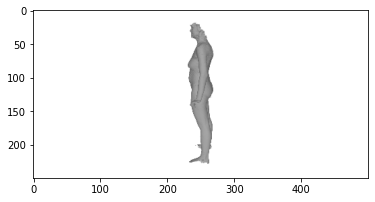

In [18]:
img_bgr_arr_l =  cv2.imread("Files_Masters/train_x/female_0088_lateral.png")
img_rgb_arr_l = cv2.resize(img_bgr_arr_l, (500,250))
plt.imshow(img_rgb_arr_l)

In [19]:
df[:7]

,Path-Frontal,Path-Lateral,Height,SeatBackAngle,Outseam,Inseam,Crotch,TrouserWaist,HipCirc
0,Files_Masters/train_x/female_0000_frontal.png,Files_Masters/train_x/female_0000_lateral.png,162.6,18.7,99.2,78.9,78.0,84.4,94.2
1,Files_Masters/train_x/female_0001_frontal.png,Files_Masters/train_x/female_0001_lateral.png,159.0,19.6,89.5,71.7,70.6,83.7,99.3
2,Files_Masters/train_x/female_0002_frontal.png,Files_Masters/train_x/female_0002_lateral.png,169.6,18.3,106.5,81.3,80.2,95.3,107.9
3,Files_Masters/train_x/female_0003_frontal.png,Files_Masters/train_x/female_0003_lateral.png,163.5,20.1,99.1,77.4,76.0,81.5,89.3
4,Files_Masters/train_x/female_0004_frontal.png,Files_Masters/train_x/female_0004_lateral.png,153.0,13.0,92.3,72.6,71.5,97.2,100.3
5,Files_Masters/train_x/female_0005_frontal.png,Files_Masters/train_x/female_0005_lateral.png,177.1,16.5,114.7,91.0,90.1,85.7,97.7
6,Files_Masters/train_x/female_0006_frontal.png,Files_Masters/train_x/female_0006_lateral.png,155.4,20.1,95.6,72.8,71.3,87.0,98.2


In [20]:
#Crearemos archivos .npz con la finalidad de guardar datos escenciales como
#Las imagenes frontales, laterales, las medidas y la altura de cada fila del
#Dataframe obtenido.
#Al final tendremos la misma cantidad de archivos .npz que numero de columnas   
npz_paths=[]

#Recorremos cada fila de nuestro dataframe
for i, row in df.iterrows():
  #La imagen frontal, la convertimos a RGB y hacemos un reescalamiento
  #de sus dimensiones
  try:
    img_path_f=row['Path-Frontal']
    img_bgr_arr_f = process_person_body(img_path_f)
    img_rgb_arr_f = cv2.resize(img_bgr_arr_f, (500,250))

    #La imagen lateral, la convertimos a RGB y hacemos un reescalamiento
    #de sus dimensiones
    img_path_l=row['Path-Lateral']
    img_bgr_arr_l =  process_person_body(img_path_l)

    img_rgb_arr_l = cv2.resize(img_bgr_arr_l, (500,250))
  except:
    npz_paths.append(None)
    continue
  
  #Creamos el archivo .npz que contendra las imagenes, medidas y la altura 
  npz_path=img_path_f.split('.')[0]+'.npz'
  npz_paths.append(npz_path)

  #Obtenemos los valores de las medidas por la fila donde se encuentra el "for"
  seatBackAngle=row['SeatBackAngle'] 
  outseam=row['Outseam']
  inseam=row['Inseam']
  crotch=row['Crotch']
  trouserWaist=row['TrouserWaist']
  hipCirc=row['HipCirc']
  #Obtenemos los valores de la altura por la fila donde se encuentra el "for"
  height = row['Height']
  
  #Le inputamos los valores de los datos que necesitamos al archivo npz 
  #como si fuera un diccionario
  np.savez_compressed(npz_path, 
                      img_f=img_rgb_arr_f, img_l=img_rgb_arr_l,height=height,
                      seatBackAngle=seatBackAngle,outseam=outseam,
                      inseam=inseam,crotch=crotch,trouserWaist=trouserWaist,
                      hipCirc=hipCirc)

#Creamos una nueva columna NPZ_Path en el Data Frame(df)
df['NPZ_Path']=pd.Series(npz_paths)
df

,Path-Frontal,Path-Lateral,Height,SeatBackAngle,Outseam,Inseam,Crotch,TrouserWaist,HipCirc,NPZ_Path
0,Files_Masters/train_x/female_0000_frontal.png,Files_Masters/train_x/female_0000_lateral.png,162.6,18.7,99.2,78.9,78.0,84.4,94.2,None
1,Files_Masters/train_x/female_0001_frontal.png,Files_Masters/train_x/female_0001_lateral.png,159.0,19.6,89.5,71.7,70.6,83.7,99.3,Files_Masters/train_x/female_0001_frontal.npz
2,Files_Masters/train_x/female_0002_frontal.png,Files_Masters/train_x/female_0002_lateral.png,169.6,18.3,106.5,81.3,80.2,95.3,107.9,Files_Masters/train_x/female_0002_frontal.npz
3,Files_Masters/train_x/female_0003_frontal.png,Files_Masters/train_x/female_0003_lateral.png,163.5,20.1,99.1,77.4,76.0,81.5,89.3,Files_Masters/train_x/female_0003_frontal.npz
4,Files_Masters/train_x/female_0004_frontal.png,Files_Masters/train_x/female_0004_lateral.png,153.0,13.0,92.3,72.6,71.5,97.2,100.3,Files_Masters/train_x/female_0004_frontal.npz
...,...,...,...,...,...,...,...,...,...,...
170,Files_Masters/train_x/female_0171_frontal.png,Files_Masters/train_x/female_0171_lateral.png,162.4,24.9,101.8,74.9,73.4,100.2,117.2,Files_Masters/train_x/female_0171_frontal.npz
171,Files_Masters/train_x/female_0172_frontal.png,Files_Masters/train_x/female_0172_lateral.png,138.9,25.5,95.2,73.1,72.2,71.8,90.0,Files_Masters/train_x/female_0172_frontal.npz
172,Files_Masters/train_x/female_0173_frontal.png,Files_Masters/train_x/female_0173_lateral.png,159.5,19.6,94.2,76.7,75.4,84.0,89.3,None
173,Files_Masters/train_x/female_0174_frontal.png,Files_Masters/train_x/female_0174_lateral.png,164.8,15.4,101.4,80.1,79.0,86.8,96.9,None


In [21]:
df=df.dropna()
df.reset_index(drop=True, inplace=True)
df

,Path-Frontal,Path-Lateral,Height,SeatBackAngle,Outseam,Inseam,Crotch,TrouserWaist,HipCirc,NPZ_Path
0,Files_Masters/train_x/female_0001_frontal.png,Files_Masters/train_x/female_0001_lateral.png,159.0,19.6,89.5,71.7,70.6,83.7,99.3,Files_Masters/train_x/female_0001_frontal.npz
1,Files_Masters/train_x/female_0002_frontal.png,Files_Masters/train_x/female_0002_lateral.png,169.6,18.3,106.5,81.3,80.2,95.3,107.9,Files_Masters/train_x/female_0002_frontal.npz
2,Files_Masters/train_x/female_0003_frontal.png,Files_Masters/train_x/female_0003_lateral.png,163.5,20.1,99.1,77.4,76.0,81.5,89.3,Files_Masters/train_x/female_0003_frontal.npz
3,Files_Masters/train_x/female_0004_frontal.png,Files_Masters/train_x/female_0004_lateral.png,153.0,13.0,92.3,72.6,71.5,97.2,100.3,Files_Masters/train_x/female_0004_frontal.npz
4,Files_Masters/train_x/female_0005_frontal.png,Files_Masters/train_x/female_0005_lateral.png,177.1,16.5,114.7,91.0,90.1,85.7,97.7,Files_Masters/train_x/female_0005_frontal.npz
...,...,...,...,...,...,...,...,...,...,...
145,Files_Masters/train_x/female_0168_frontal.png,Files_Masters/train_x/female_0168_lateral.png,164.8,24.9,100.3,80.7,79.6,87.9,106.1,Files_Masters/train_x/female_0168_frontal.npz
146,Files_Masters/train_x/female_0169_frontal.png,Files_Masters/train_x/female_0169_lateral.png,171.5,22.6,103.5,81.1,79.6,94.2,110.3,Files_Masters/train_x/female_0169_frontal.npz
147,Files_Masters/train_x/female_0171_frontal.png,Files_Masters/train_x/female_0171_lateral.png,162.4,24.9,101.8,74.9,73.4,100.2,117.2,Files_Masters/train_x/female_0171_frontal.npz
148,Files_Masters/train_x/female_0172_frontal.png,Files_Masters/train_x/female_0172_lateral.png,138.9,25.5,95.2,73.1,72.2,71.8,90.0,Files_Masters/train_x/female_0172_frontal.npz


In [22]:
#Ahora que el df contiene la ruta del archivo .npz no es necesario
#Tener la ruta de las imagenes en el Data Frame (df)
df.drop(['Path-Frontal','Path-Lateral','Height'], inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
df

,SeatBackAngle,Outseam,Inseam,Crotch,TrouserWaist,HipCirc,NPZ_Path
0,19.6,89.5,71.7,70.6,83.7,99.3,Files_Masters/train_x/female_0001_frontal.npz
1,18.3,106.5,81.3,80.2,95.3,107.9,Files_Masters/train_x/female_0002_frontal.npz
2,20.1,99.1,77.4,76.0,81.5,89.3,Files_Masters/train_x/female_0003_frontal.npz
3,13.0,92.3,72.6,71.5,97.2,100.3,Files_Masters/train_x/female_0004_frontal.npz
4,16.5,114.7,91.0,90.1,85.7,97.7,Files_Masters/train_x/female_0005_frontal.npz
...,...,...,...,...,...,...,...
145,24.9,100.3,80.7,79.6,87.9,106.1,Files_Masters/train_x/female_0168_frontal.npz
146,22.6,103.5,81.1,79.6,94.2,110.3,Files_Masters/train_x/female_0169_frontal.npz
147,24.9,101.8,74.9,73.4,100.2,117.2,Files_Masters/train_x/female_0171_frontal.npz
148,25.5,95.2,73.1,72.2,71.8,90.0,Files_Masters/train_x/female_0172_frontal.npz


##Creación del modelo CNN

In [24]:
#Creamos una función que nos retornará  los datos que nos servirán como input
#Y los datos que nos servirán como output, todo esto contenido en un array np
def get_x_y(df):
  x1,x2,x3=[],[],[]
  y1,y2,y3,y4,y5,y6=[],[],[],[],[],[]

  for name in df['NPZ_Path']:
    loaded_npz = np.load(name)

    img1 = loaded_npz['img_f']
    x1.append(img1)
    img2 = loaded_npz['img_l']
    x2.append(img2)
    i_3 = loaded_npz['height']
    x3.append(i_3)

    y1.append(loaded_npz['seatBackAngle'])
    y2.append(loaded_npz['outseam'])
    y3.append(loaded_npz['inseam'])
    y4.append(loaded_npz['crotch'])
    y5.append(loaded_npz['trouserWaist'])
    y6.append(loaded_npz['hipCirc'])


  x1,x2,x3=np.array(x1),np.array(x2),np.array(x3)
  y1,y2,y3,y4,y5,y6=np.array(y1),np.array(y2),np.array(y3),np.array(y4),np.array(y5),np.array(y6)
  return (x1,x2,x3), (y1,y2,y3,y4,y5,y6)


In [25]:
(x1,x2,x3),(y1,y2,y3,y4,y5,y6)=get_x_y(df)

##Cross valitation

In [26]:
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from keras.layers.convolutional import Conv2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

import pandas as pd
import os
import numpy as np
import math
from sklearn import metrics
from scipy.stats import zscore
from sklearn.model_selection import KFold

aux=math.pow(10,6)

# Validación cruzada
kf = KFold(5, shuffle=True, random_state=9958) #Uso de Kfold
oos_y = []
oos_pred = []

fold = 0
for train, test in kf.split(df):
    fold+=1
    print(f"Fold #{fold}")
    
    (x1_train,x2_train,x3_train),(y1_train,y2_train,y3_train,y4_train,y5_train,y6_train)=(x1[train],x2[train],x3[train]),(y1[train],y2[train],y3[train],y4[train],y5[train],y6[train])
    (x1_test,x2_test,x3_test),(y1_test,y2_test,y3_test,y4_test,y5_test,y6_test) = (x1[test],x2[test],x3[test]),(y1[test],y2[test],y3[test],y4[test],y5[test],y6[test])
    
    input_img1=layers.Input(shape=(250,500,3))
    x_1       =layers.Lambda(preprocess_input)(input_img1)
    x_1       =Conv2D(16,2, padding="same",activation='relu')(x_1)
    x_1       =layers.AveragePooling2D()(x_1)
    x_1       =Conv2D(32,2, padding="same",activation='relu')(x_1)
    x_1       =layers.AveragePooling2D()(x_1)
    x_1       =layers.Dropout(0.2)(x_1)
    x_1       =layers.Flatten()(x_1)
    x_1       =layers.Dense(50, activation='relu')(x_1)
    x_1       =Model(inputs=input_img1, outputs=x_1, name='img_f')
    
    input_img2=layers.Input(shape=(250,500,3))
    x_2       =layers.Lambda(preprocess_input)(input_img2)
    x_2       =Conv2D(16,2, padding="same",activation='relu')(x_2)
    x_2       =layers.AveragePooling2D()(x_2)
    x_2       =Conv2D(32,2, padding="same",activation='relu')(x_2)
    x_2       =layers.Dropout(0.2)(x_2)
    x_2       =layers.AveragePooling2D()(x_2)
    x_2       =layers.Flatten()(x_2)
    x_2       =layers.Dense(50, activation='relu')(x_2)
    x_2       =Model(inputs=input_img2, outputs=x_2,name='img_l')
    
    #Part.2 del modelo - Feed-Forward
    input_i_3=layers.Input(shape=(1,))
    x_3      =layers.Dense(100, activation='relu')(input_i_3)
    x_3      =layers.Dropout(0.2)(x_3)
    x_3      =Model(inputs=input_i_3, outputs=x_3)
    
    #Part.3 Concatenate
    c1=layers.concatenate([x_1.output,x_2.output,x_3.output])
    c1=layers.Dense(100, activation='relu')(c1)
    
    c2=layers.concatenate([x_1.output,x_2.output,x_3.output])
    c2=layers.Dense(100, activation='relu')(c2)
    
    c3=layers.concatenate([x_1.output,x_2.output,x_3.output])
    c3=layers.Dense(100, activation='relu')(c3)
    
    c4=layers.concatenate([x_1.output,x_2.output,x_3.output])
    c4=layers.Dense(100, activation='relu')(c4)
    
    c5=layers.concatenate([x_1.output,x_2.output,x_3.output])
    c5=layers.Dense(100, activation='relu')(c5)
    
    c6=layers.concatenate([x_1.output,x_2.output,x_3.output])
    c6=layers.Dense(100, activation='relu')(c6)
    
    y_1 = layers.Dense(80, activation='relu')(c1)
    y_1 = layers.Dense(1, activation='relu',name='output_T_H_B')(y_1)
    
    y_2 = layers.Dense(80, activation='relu')(c2)
    y_2 = layers.Dense(1, activation='relu',name='output_CL_B')(y_2)
    
    y_3 = layers.Dense(80, activation='relu')(c3)
    y_3 = layers.Dense(1, activation='relu',name='output_CL_F')(y_3)
    
    y_4 = layers.Dense(80, activation='relu')(c4)
    y_4 = layers.Dense(1, activation='relu',name='output_A_C')(y_4)
    
    y_5 = layers.Dense(80, activation='relu')(c5)
    y_5 = layers.Dense(1, activation='relu',name='output_H_T_H')(y_5)
    
    y_6 = layers.Dense(80, activation='relu')(c6)
    y_6 = layers.Dense(1, activation='relu',name='output_H_H')(y_6)
    
    model = Model(inputs=[x_1.input,x_2.input,x_3.input], outputs=[y_1,y_2,y_3,y_4,y_5,y_6])
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x=[x1_train,x2_train,x3_train],
          y=[y1_train,y2_train,y3_train,y4_train,y5_train,y6_train],
          validation_data=([x1_test,x2_test,x3_test],
                           [y1_test,y2_test,y3_test,y4_test,y5_test,y6_test]),epochs=50)
    
    pred = model.predict([x1_test,x2_test,x3_test])
    
    oos_y.append([y1_test,y2_test,y3_test,y4_test,y5_test,y6_test])
    oos_pred.append([pred[0].flatten(),pred[1].flatten(),pred[2].flatten(),pred[3].flatten(),pred[4].flatten(),pred[5].flatten()])    

    # Medida RMSE de cada fold 
    score = np.sqrt(metrics.mean_squared_error([y1_test,y2_test,y3_test,y4_test,y5_test,y6_test],
                                               [pred[0].flatten(),pred[1].flatten(),pred[2].flatten(),pred[3].flatten(),pred[4].flatten(),pred[5].flatten()]))
    if score<aux:
      # Guardar el Modelo
      aux=score
      model.save('my_model.h5')


    print(f"Fold score (RMSE): {score}")


Fold #1
Epoch 1/50
4/4 [==============================] - 16s 459ms/step - loss: 27164.2383 - output_T_H_B_loss: 445.0959 - output_CL_B_loss: 3860.8323 - output_CL_F_loss: 2555.2917 - output_A_C_loss: 2005.6019 - output_H_T_H_loss: 8003.4209 - output_H_H_loss: 10293.9951 - val_loss: 20218.7539 - val_output_T_H_B_loss: 38.1187 - val_output_CL_B_loss: 1422.9067 - val_output_CL_F_loss: 695.8109 - val_output_A_C_loss: 472.1154 - val_output_H_T_H_loss: 7437.1821 - val_output_H_H_loss: 10152.6191
Epoch 2/50
4/4 [==============================] - 1s 134ms/step - loss: 19643.3574 - output_T_H_B_loss: 240.5092 - output_CL_B_loss: 491.5031 - output_CL_F_loss: 395.2758 - output_A_C_loss: 218.6540 - output_H_T_H_loss: 8003.4214 - output_H_H_loss: 10293.9951 - val_loss: 19565.0586 - val_output_T_H_B_loss: 289.8102 - val_output_CL_B_loss: 610.1403 - val_output_CL_F_loss: 745.1820 - val_output_A_C_loss: 330.1237 - val_output_H_T_H_loss: 7437.1821 - val_output_H_H_loss: 10152.6191
Epoch 3/50
4/4 [====

##HASTA ACA LLEGA EL CROSS VALIDATION

In [27]:
from tensorflow.keras.models import load_model

#Con esta función cargas tus dos imagenes y la altura para que ser predecidos
#Las 6 siguientes medidas
def resultPredict(path_model_trained,img1,img2,height): 
  x1_l,x2_l,x3_l=[],[],[]

  x1 = process_person_body(img1)   
  x1 = cv2.resize(x1, (500,250))  

  x2 = process_person_body(img2)   
  x2 = cv2.resize(x2, (500,250))

  l_m = load_model(path_model_trained)
  
  x1_l.append(x1)
  x2_l.append(x2)
  x3_l.append(height)

  pdt=l_m.predict([np.array(x1_l),np.array(x2_l),np.array(x3_l)])

  n_df=pd.DataFrame()

  n_df['Image-Front'] = pd.Series(img1) 
  n_df['Image-Sideways'] = pd.Series(img2) 
  n_df['Height'] = pd.Series(height) 
  n_df['Predict-SeatBackAngle'] = pd.Series(pdt[0].flatten()) 
  n_df['Predict-Outseam'] = pd.Series(pdt[1].flatten()) 
  n_df['Predict-Inseam'] = pd.Series(pdt[2].flatten()) 
  n_df['Predict-Crotch'] = pd.Series(pdt[3].flatten()) 
  n_df['Predict-TrouserWaist'] = pd.Series(pdt[4].flatten()) 
  n_df['Predict-HipCirc'] = pd.Series(pdt[5].flatten()) 

  return n_df


In [28]:
#Demo de la predicción del resultado
resultPredict('my_model.h5','Files_Masters/train_x/female_0003_frontal.png','Files_Masters/train_x/female_0003_lateral.png',163.5)

,Image-Front,Image-Sideways,Height,Predict-SeatBackAngle,Predict-Outseam,Predict-Inseam,Predict-Crotch,Predict-TrouserWaist,Predict-HipCirc
0,Files_Masters/train_x/female_0003_frontal.png,Files_Masters/train_x/female_0003_lateral.png,163.5,19.437061,95.438667,77.679558,76.125542,81.179909,92.328445


In [29]:
#Demo de la predicción de otro resultado
resultPredict('my_model.h5','Files_Masters/train_x/female_0036_frontal.png','Files_Masters/train_x/female_0036_lateral.png',164.2)

,Image-Front,Image-Sideways,Height,Predict-SeatBackAngle,Predict-Outseam,Predict-Inseam,Predict-Crotch,Predict-TrouserWaist,Predict-HipCirc
0,Files_Masters/train_x/female_0036_frontal.png,Files_Masters/train_x/female_0036_lateral.png,164.2,24.736855,101.728706,79.103592,78.671906,95.023827,111.884132


##Referencias
*   K.fold : https://www.youtube.com/watch?v=maiQf8ray_s
*   CNN Multi-Input : https://www.youtube.com/watch?v=4-O14gOdRso

